In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_conf_matrix_combined(z_human_list, z_dl_list, labels_list, titles_list, tilt, cb):
    fontS = 45
    fig, axes = plt.subplots(3, 2, figsize=(34, 34), dpi=400)
    sns.set(font_scale=2)
    plt.subplots_adjust(wspace = -0.4)
    for i, (z_human, z_dl, labels, title) in enumerate(zip(z_human_list, z_dl_list, labels_list, titles_list)):
        # Plot Human Confusion Matrix
        ax_human = axes[i, 0]
        plot_single_conf_matrix(ax_human, z_human, labels, title + ' Human', tilt, False, fontS, xlabel=(i == 2), ylabel=True)

        # Plot DL Confusion Matrix
        ax_dl = axes[i, 1]
        plot_single_conf_matrix(ax_dl, z_dl, labels, title + ' DL', tilt, False, fontS, xlabel=(i == 2), ylabel=False)
        
    # fig.text(0.5, 0.07, 'Predicted labels', ha='center', va='center', fontsize=fontS)
    # fig.text(0.22, 0.5, 'True labels', ha='center', va='center', rotation='vertical', fontsize=fontS)

    fig.text(0.35, 0.90, 'Human', ha='center', va='center', fontsize=fontS)
    fig.text(0.65, 0.90, 'DL Model', ha='center', va='center', fontsize=fontS)
    plt.savefig('combined_confusion_matrix.pdf', bbox_inches='tight')
    plt.show()

def plot_single_conf_matrix(ax, z, labels, title, tilt, cb, fontS, xlabel, ylabel):
    off_diag_mask = np.eye(len(labels), dtype=bool)
    vmin = np.min(z)
    vmax = np.max(z)
    row_sums = np.sum(z, axis=1)
    percentages = (z.T / row_sums).T * 100
    
    blues = sns.color_palette("Blues", as_cmap=True)
    greens = sns.color_palette("Greens", as_cmap=True)
    
    sns.heatmap(z, annot=True, mask=~off_diag_mask, cmap=blues, vmin=vmin, vmax=vmax, cbar=cb, fmt='d', annot_kws={"size": 50}, ax=ax, square=True)
    sns.heatmap(z, annot=True, mask=off_diag_mask, cmap=greens, vmin=vmin, vmax=vmax, cbar=cb, fmt='d', annot_kws={"size": 50}, ax=ax, square=True)
    
    for i in range(len(labels)):
        for j in range(len(labels)):
            if not off_diag_mask[i, j]:
                color = "white" if blues(z[i, j] / vmax)[0] < 0.5 else "black"
            else:
                color = "white" if greens(z[i, j] / vmax)[0] < 0.5 else "black"
            ax.text(j + 0.5, i + 0.45 + (len(labels)*0.09), f'{percentages[i, j]:.1f}%', ha="center", va="center", color=color, fontsize=32, fontweight='light')


    if xlabel:
        ax.set_xlabel('Predicted labels', fontsize=fontS)
    else:
        ax.set_xlabel('')

    if ylabel:
        ax.set_ylabel('True labels', fontsize=fontS)
    else:
        ax.set_ylabel('')
    
    if tilt:
        ax.set_xticklabels(labels, rotation=45, fontsize=fontS)
        ax.set_yticklabels(labels, rotation=45, fontsize=fontS)
    else:
        ax.set_xticklabels(labels, rotation=0, fontsize=fontS)
        ax.set_yticklabels(labels, rotation=0, fontsize=fontS)
        
    # ax.set_title('', fontsize=fontS)

# Labels
lp_label = ['NL', 'WL']
size_label = ['S', 'M', 'L', 'NL']
location_label = ['H1', 'H2', 'H3', 'NL']


# Data
z_binary_DL = np.array([[136 , 8], [5, 139]])
z_binary_Human = np.array([[648, 72], [197, 523]])
z_size_DL = np.array([[45, 0, 2, 1], [7, 31, 10, 0], [2, 1, 42, 3], [1, 2, 4, 137]])
z_size_Human = np.array([[103, 26, 16, 95], [96, 47, 27, 70], [42, 71, 95, 32], [34, 26, 12, 648]])
z_location_DL = np.array([[37, 9, 2, 0], [6, 39, 2, 1], [10, 9, 27, 2], [2, 5, 1, 136]])
z_location_Human = np.array([[68, 67, 85, 20], [65, 25, 70, 80], [43, 77, 23, 97], [12, 34, 26, 648]])

# Lists
z_human_list = [z_binary_Human, z_size_Human, z_location_Human]
z_dl_list = [z_binary_DL, z_size_DL, z_location_DL]
labels_list = [lp_label, size_label, location_label]
titles_list = ["Binary Classification", "Size Classification", "Location Classification"]

# Plot combined confusion matrix
plot_conf_matrix_combined(z_human_list, z_dl_list, labels_list, titles_list, False, False)


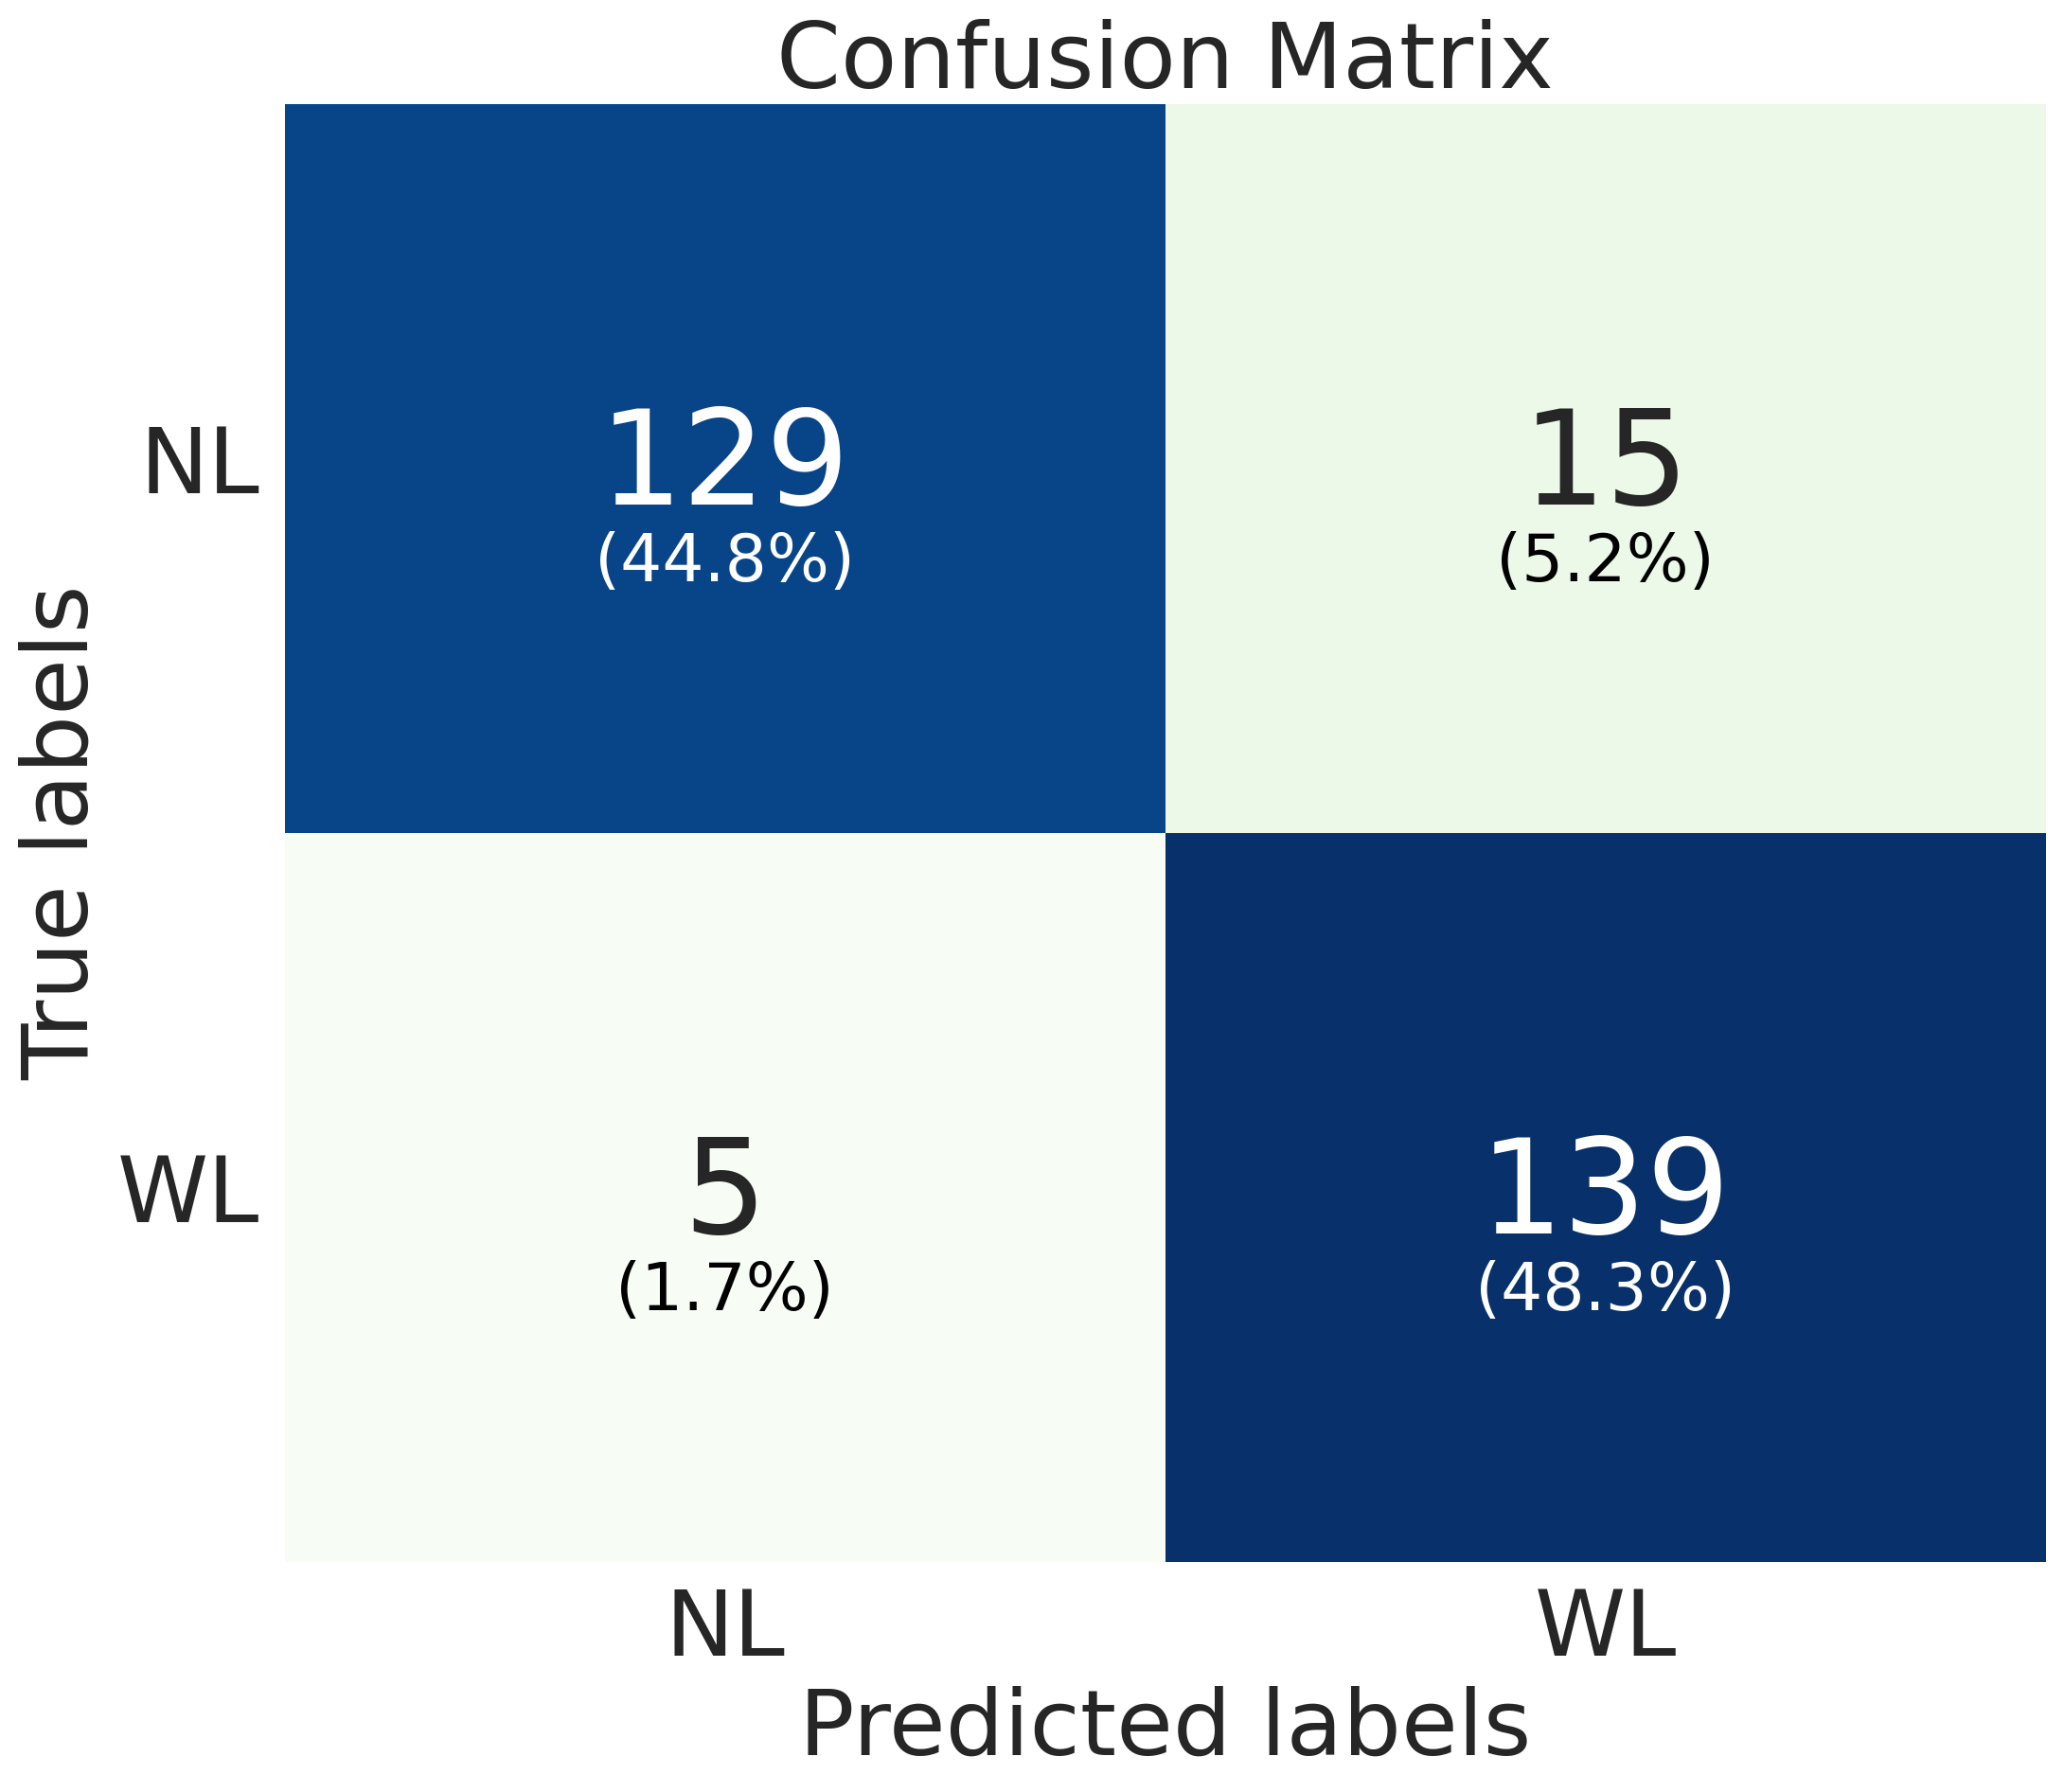

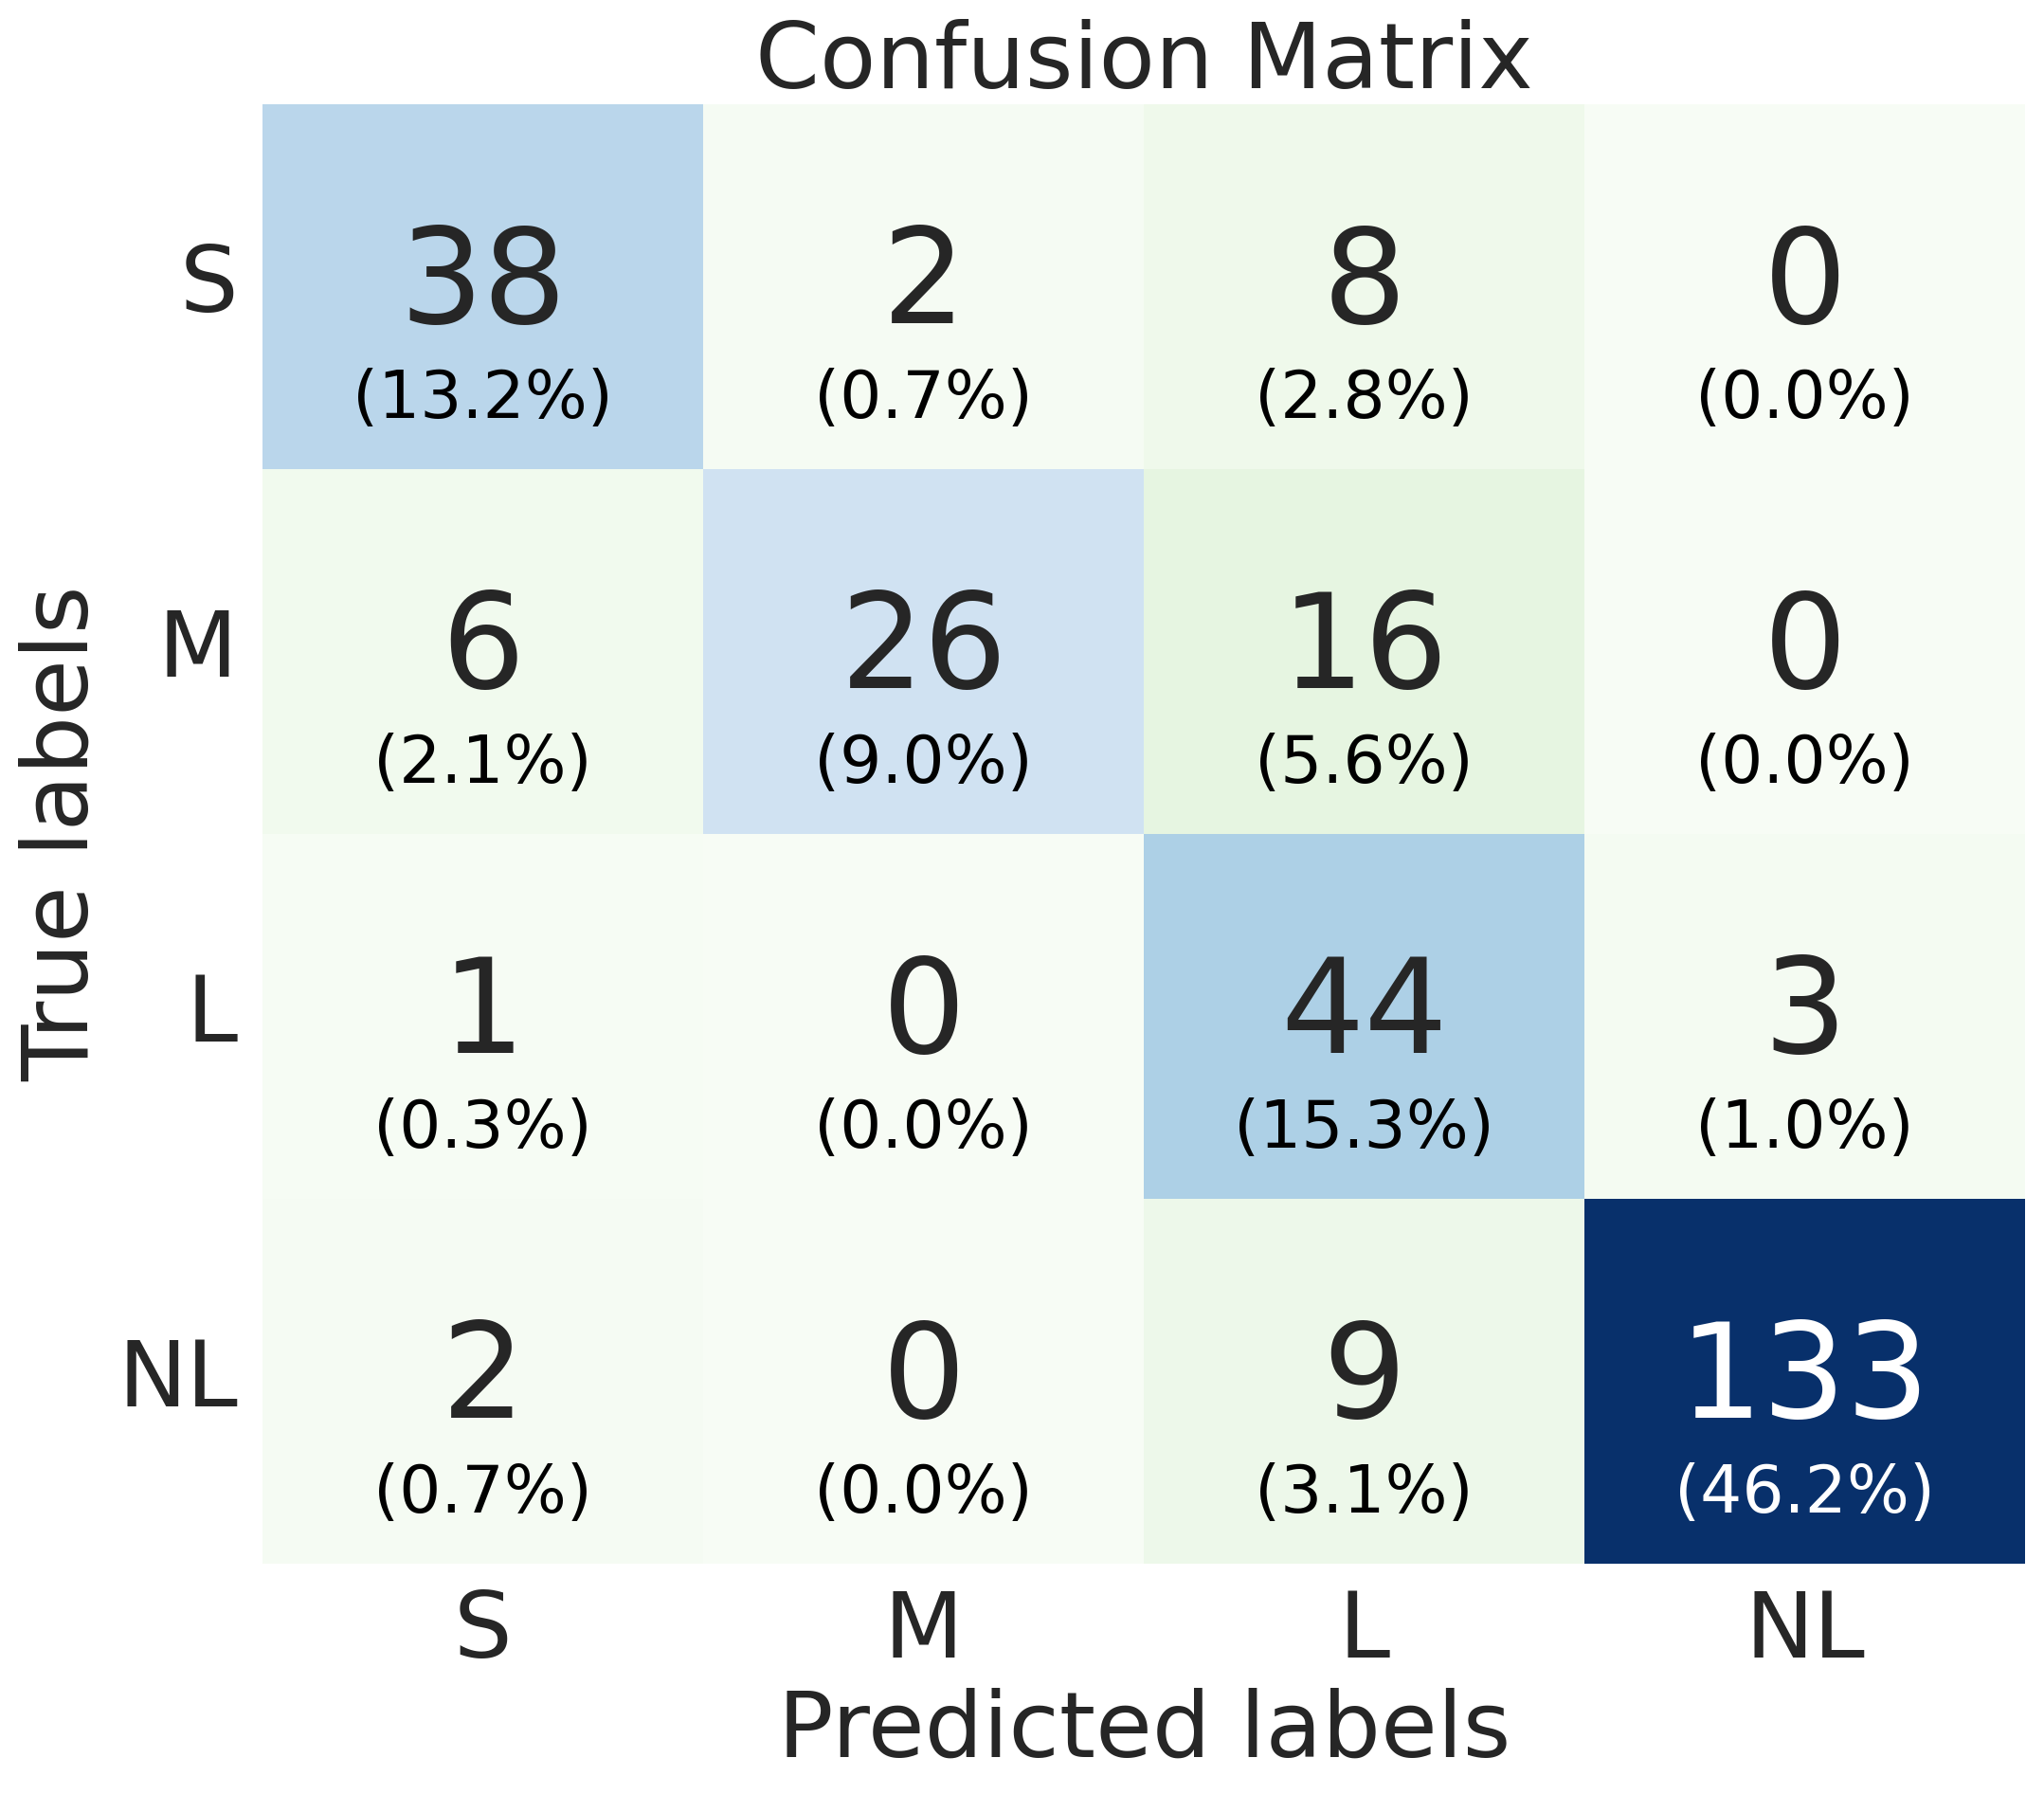

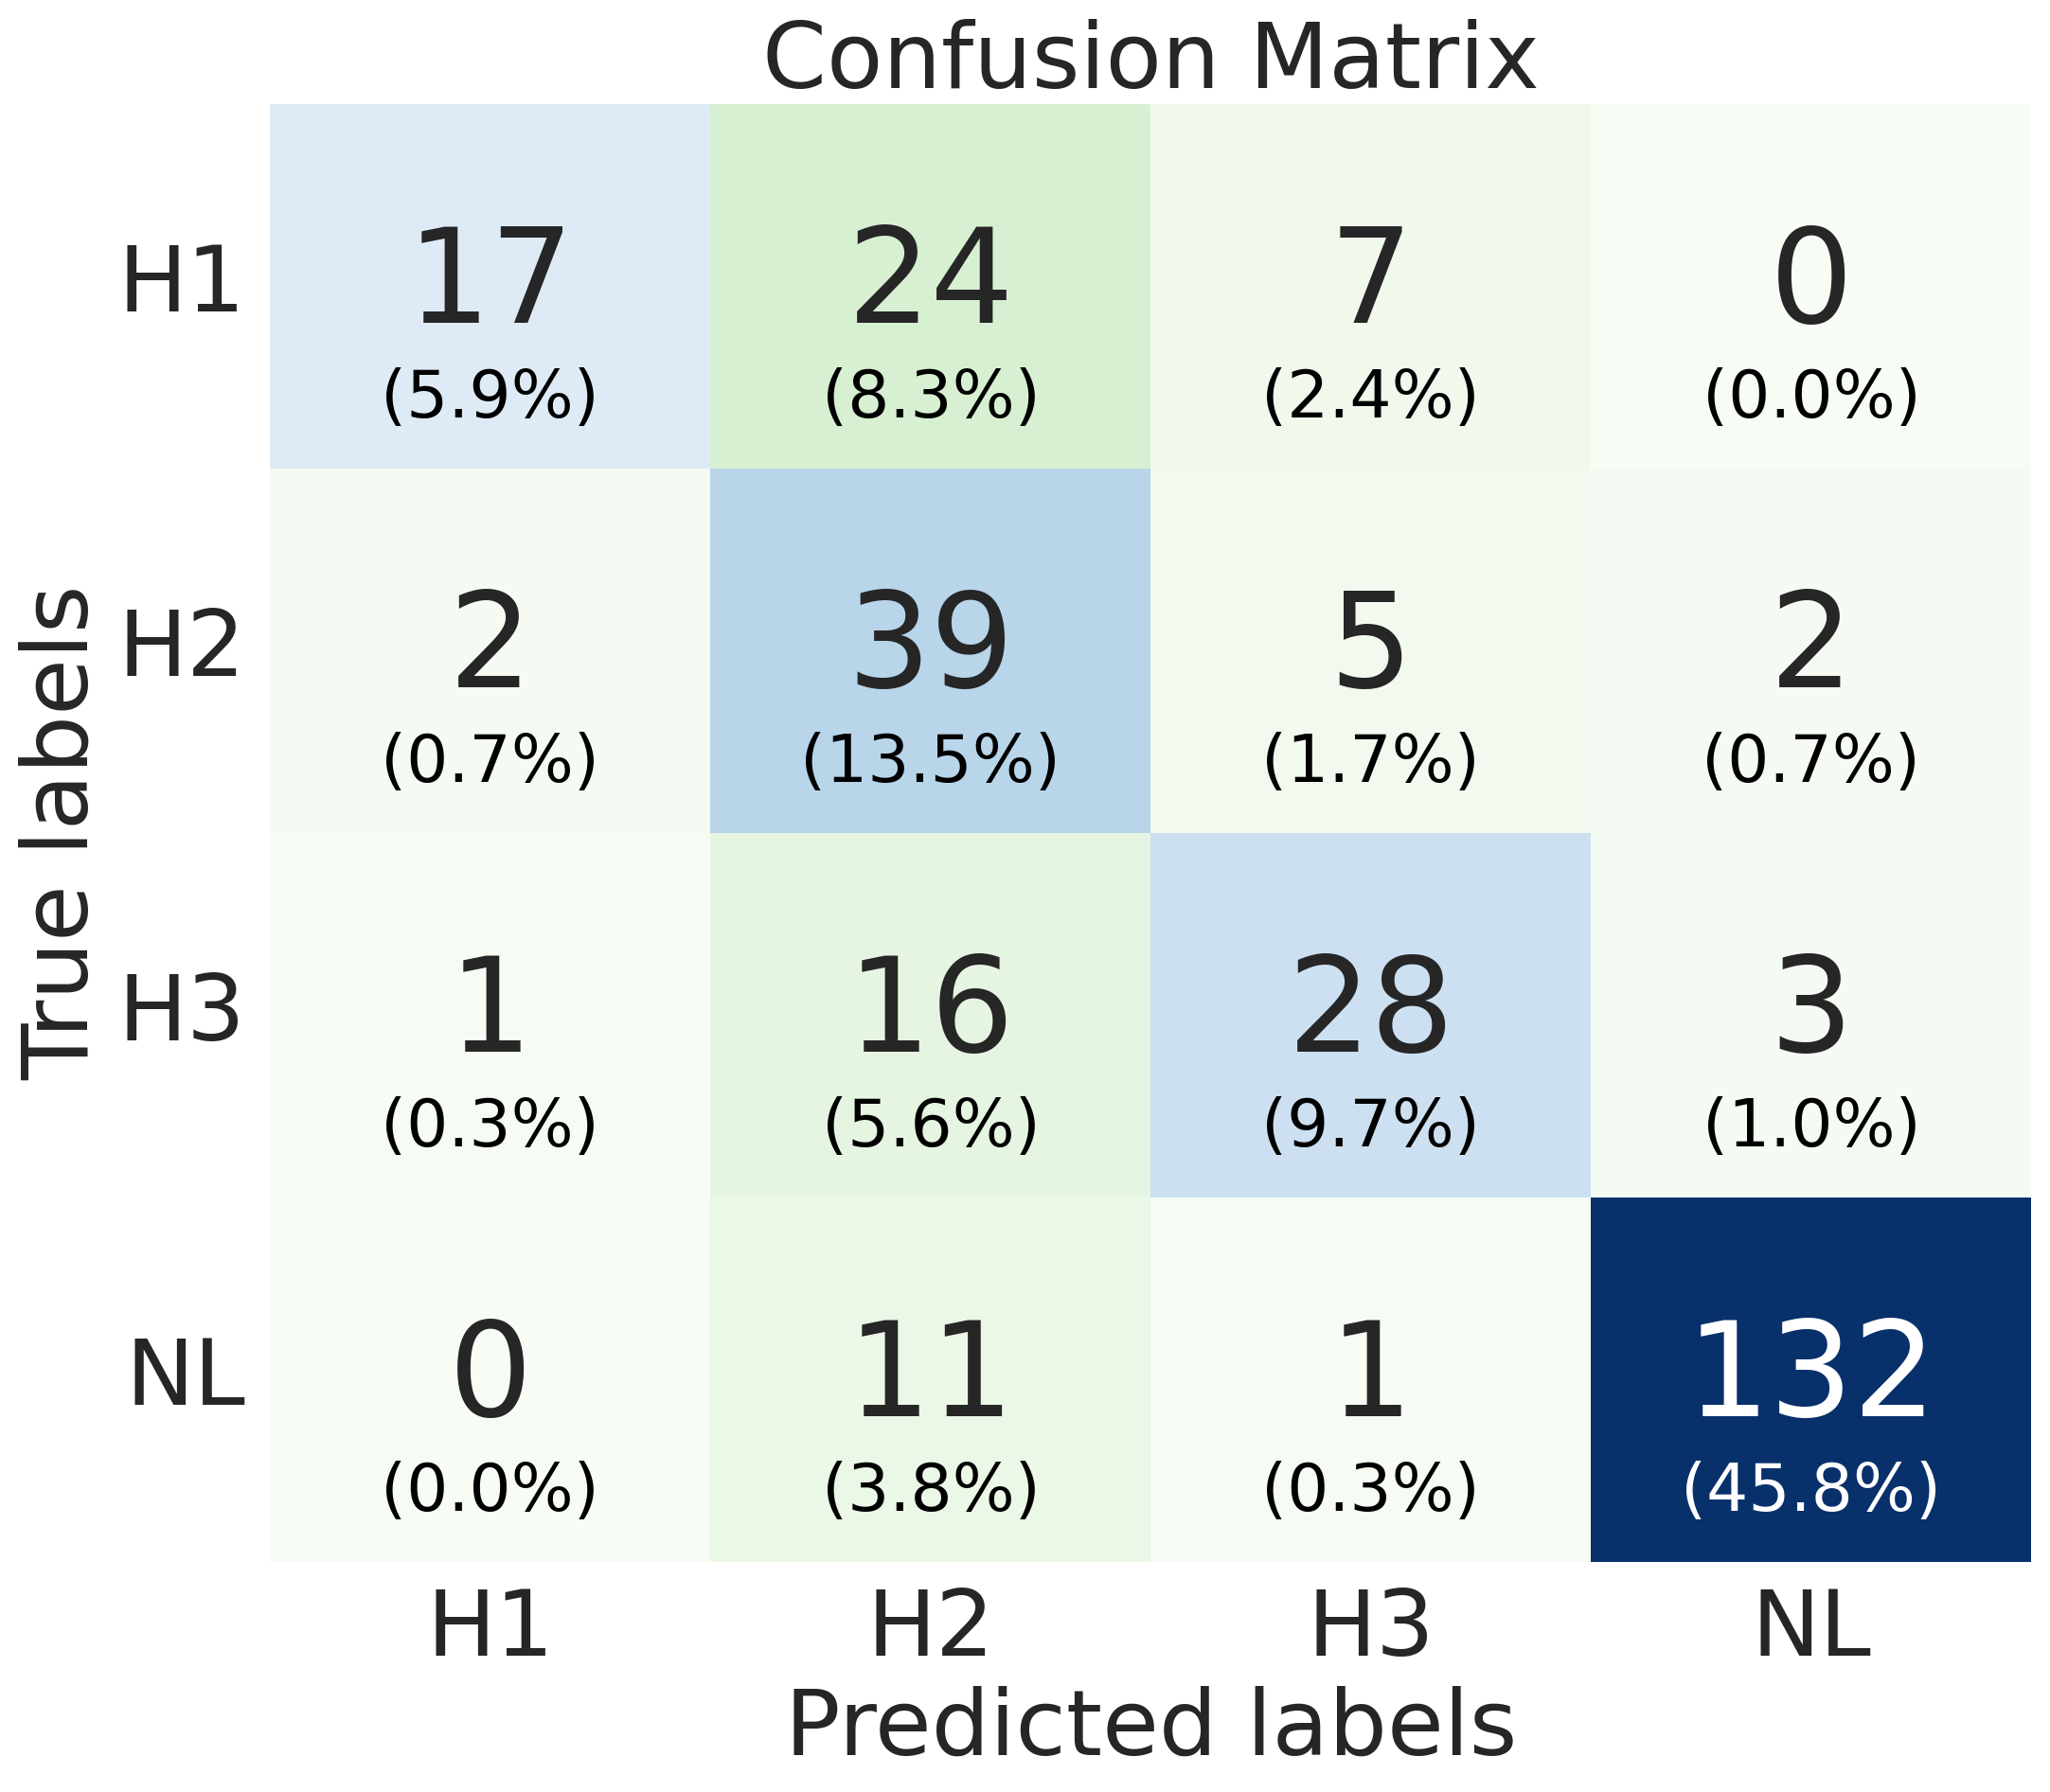

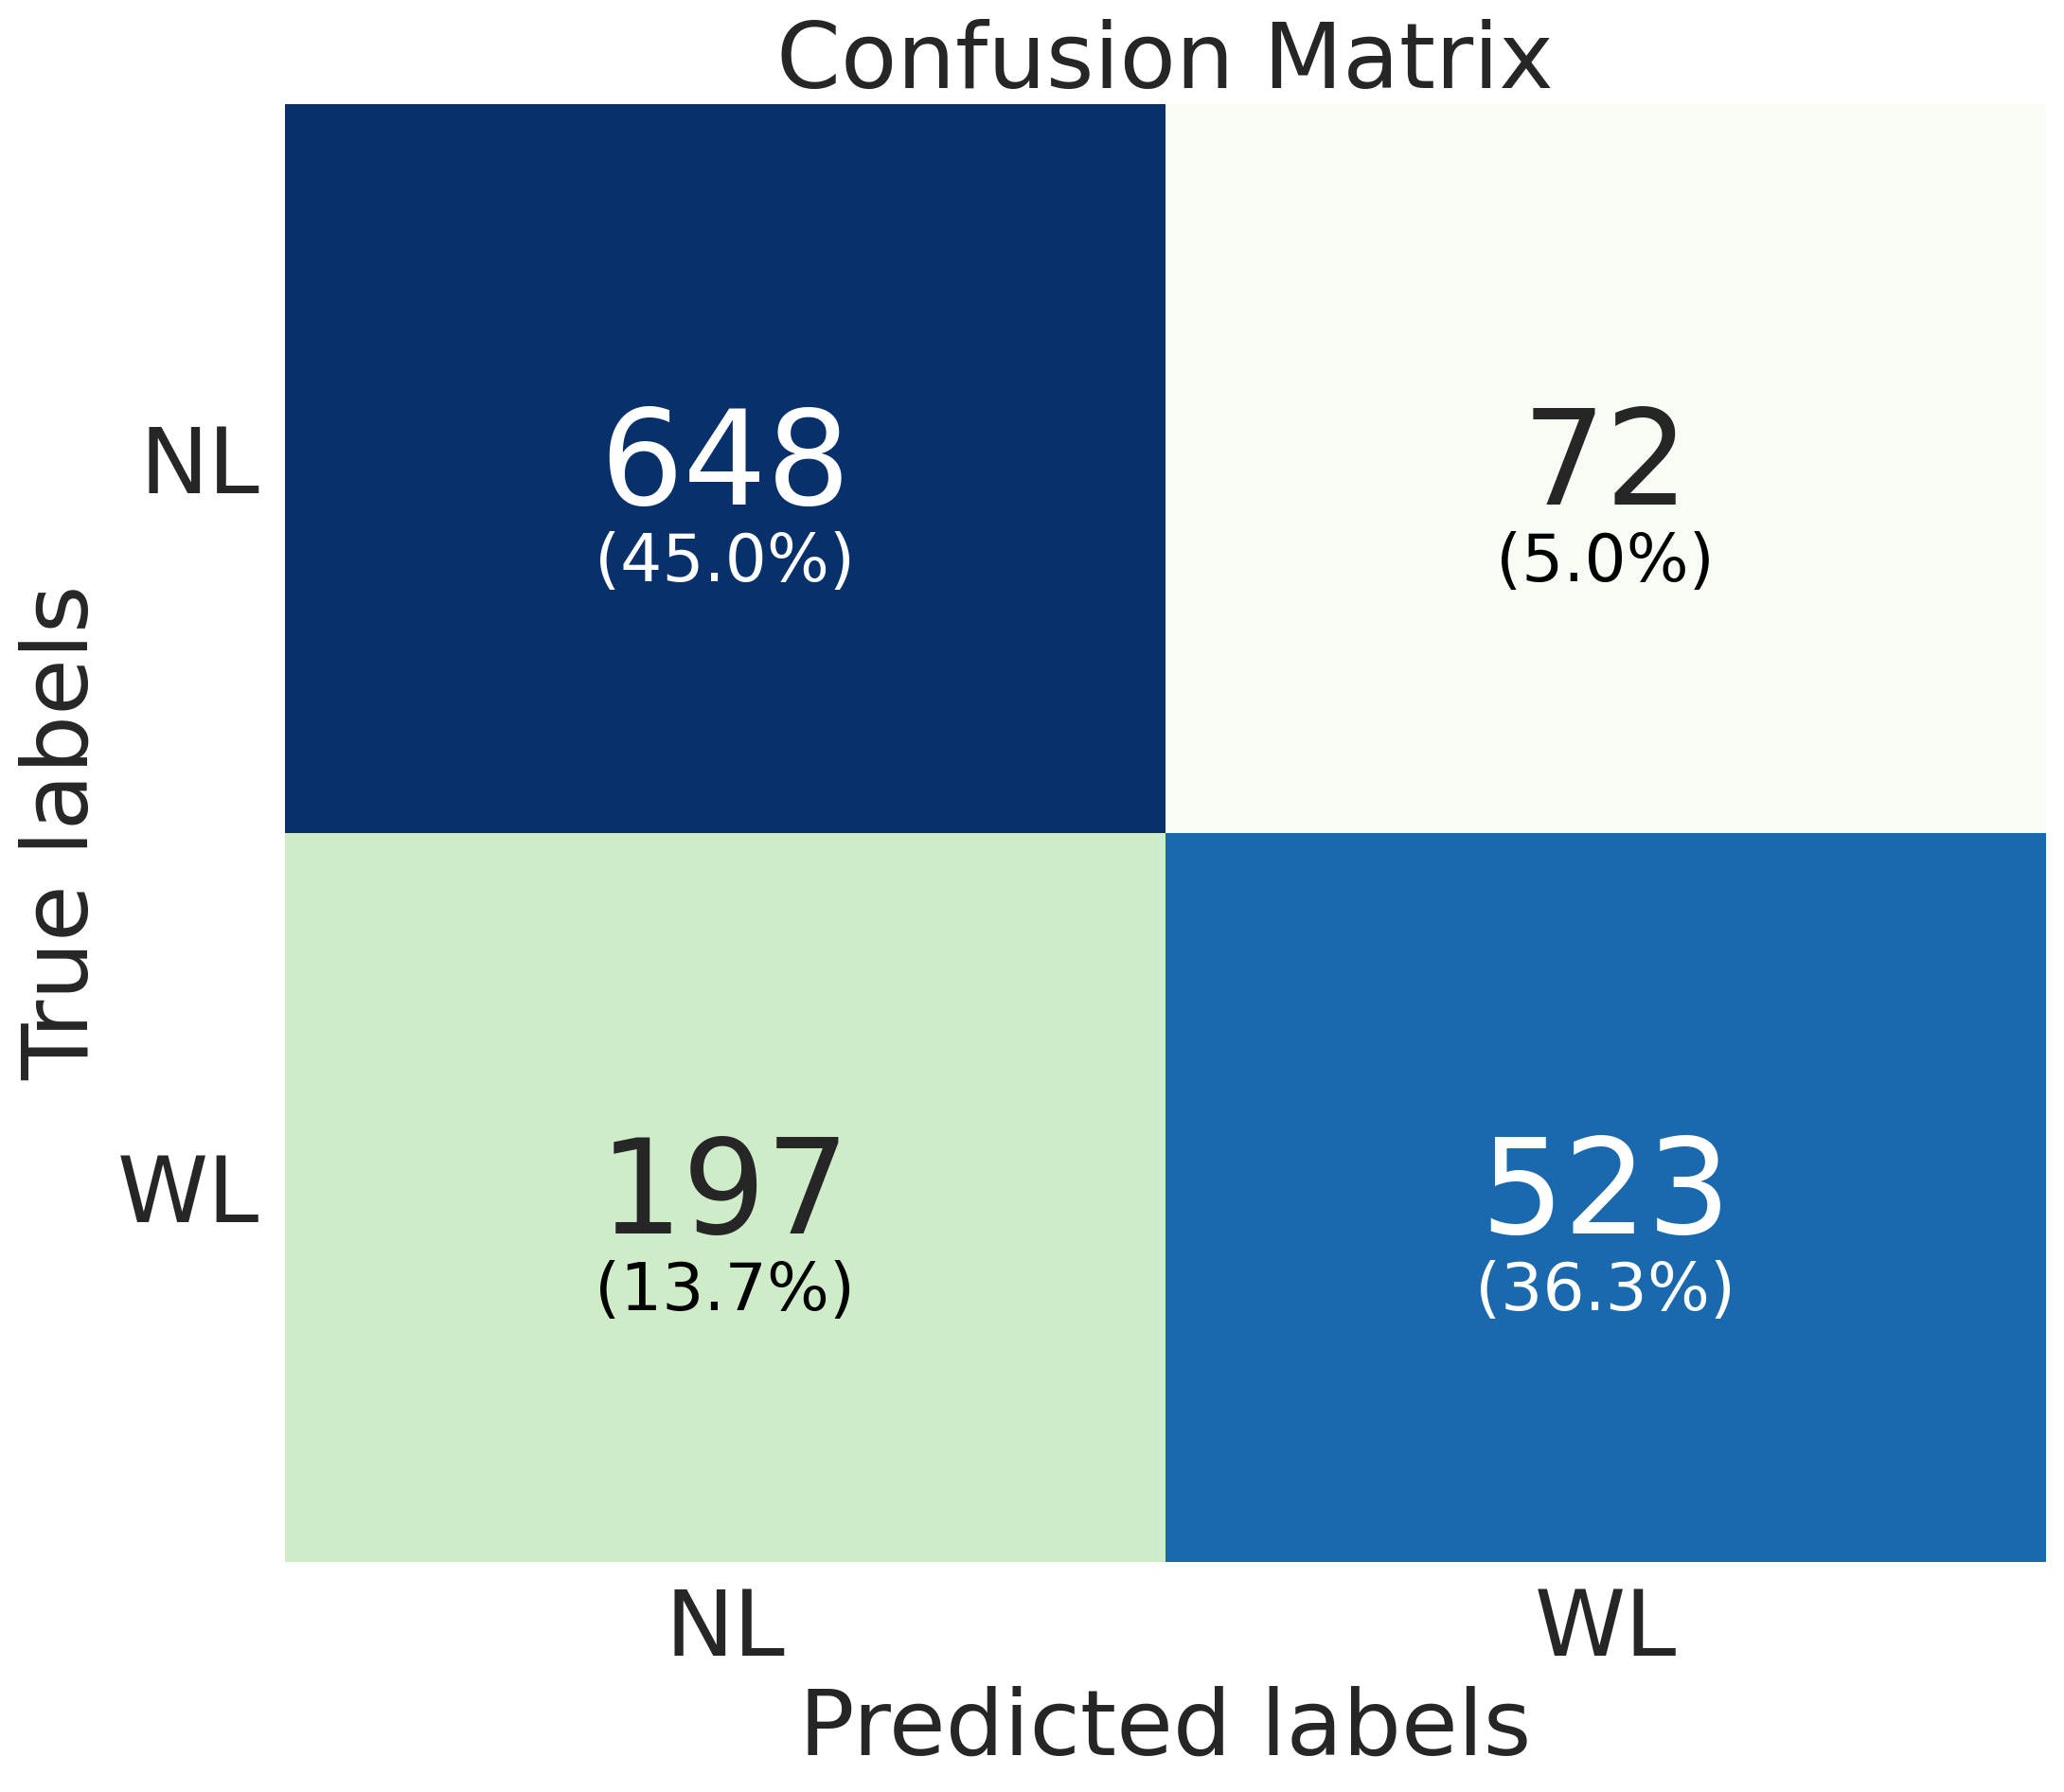

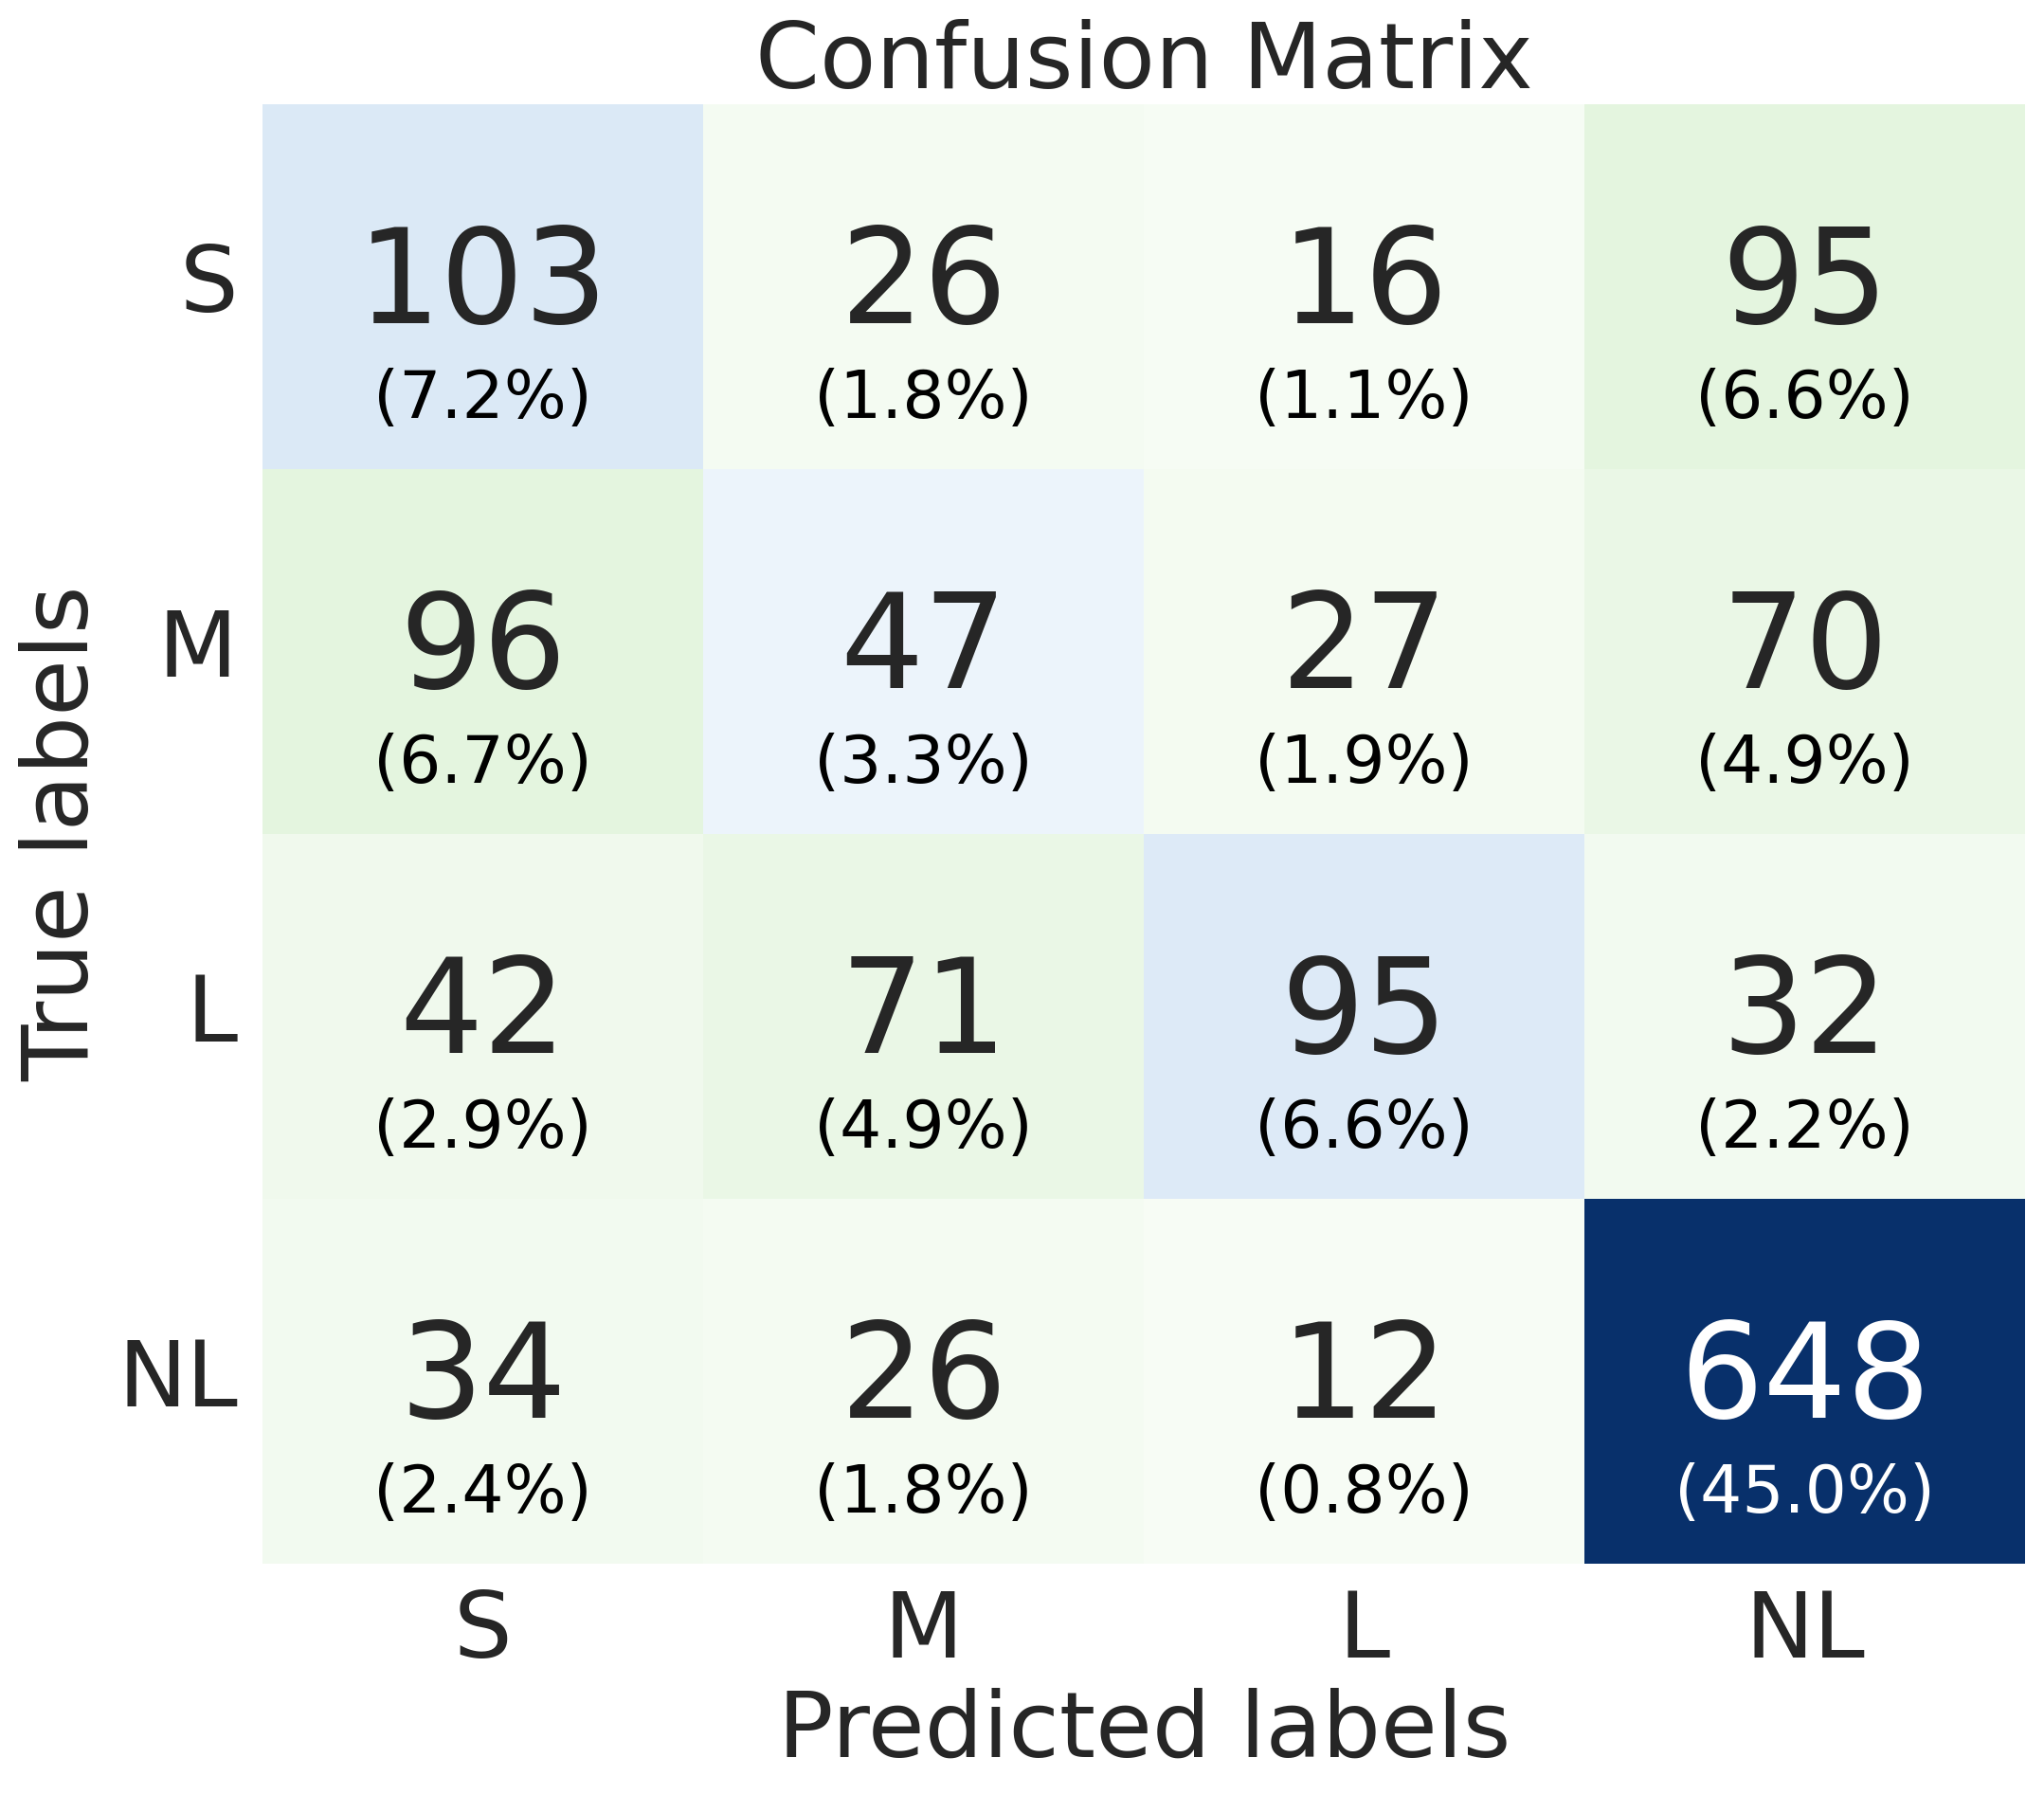

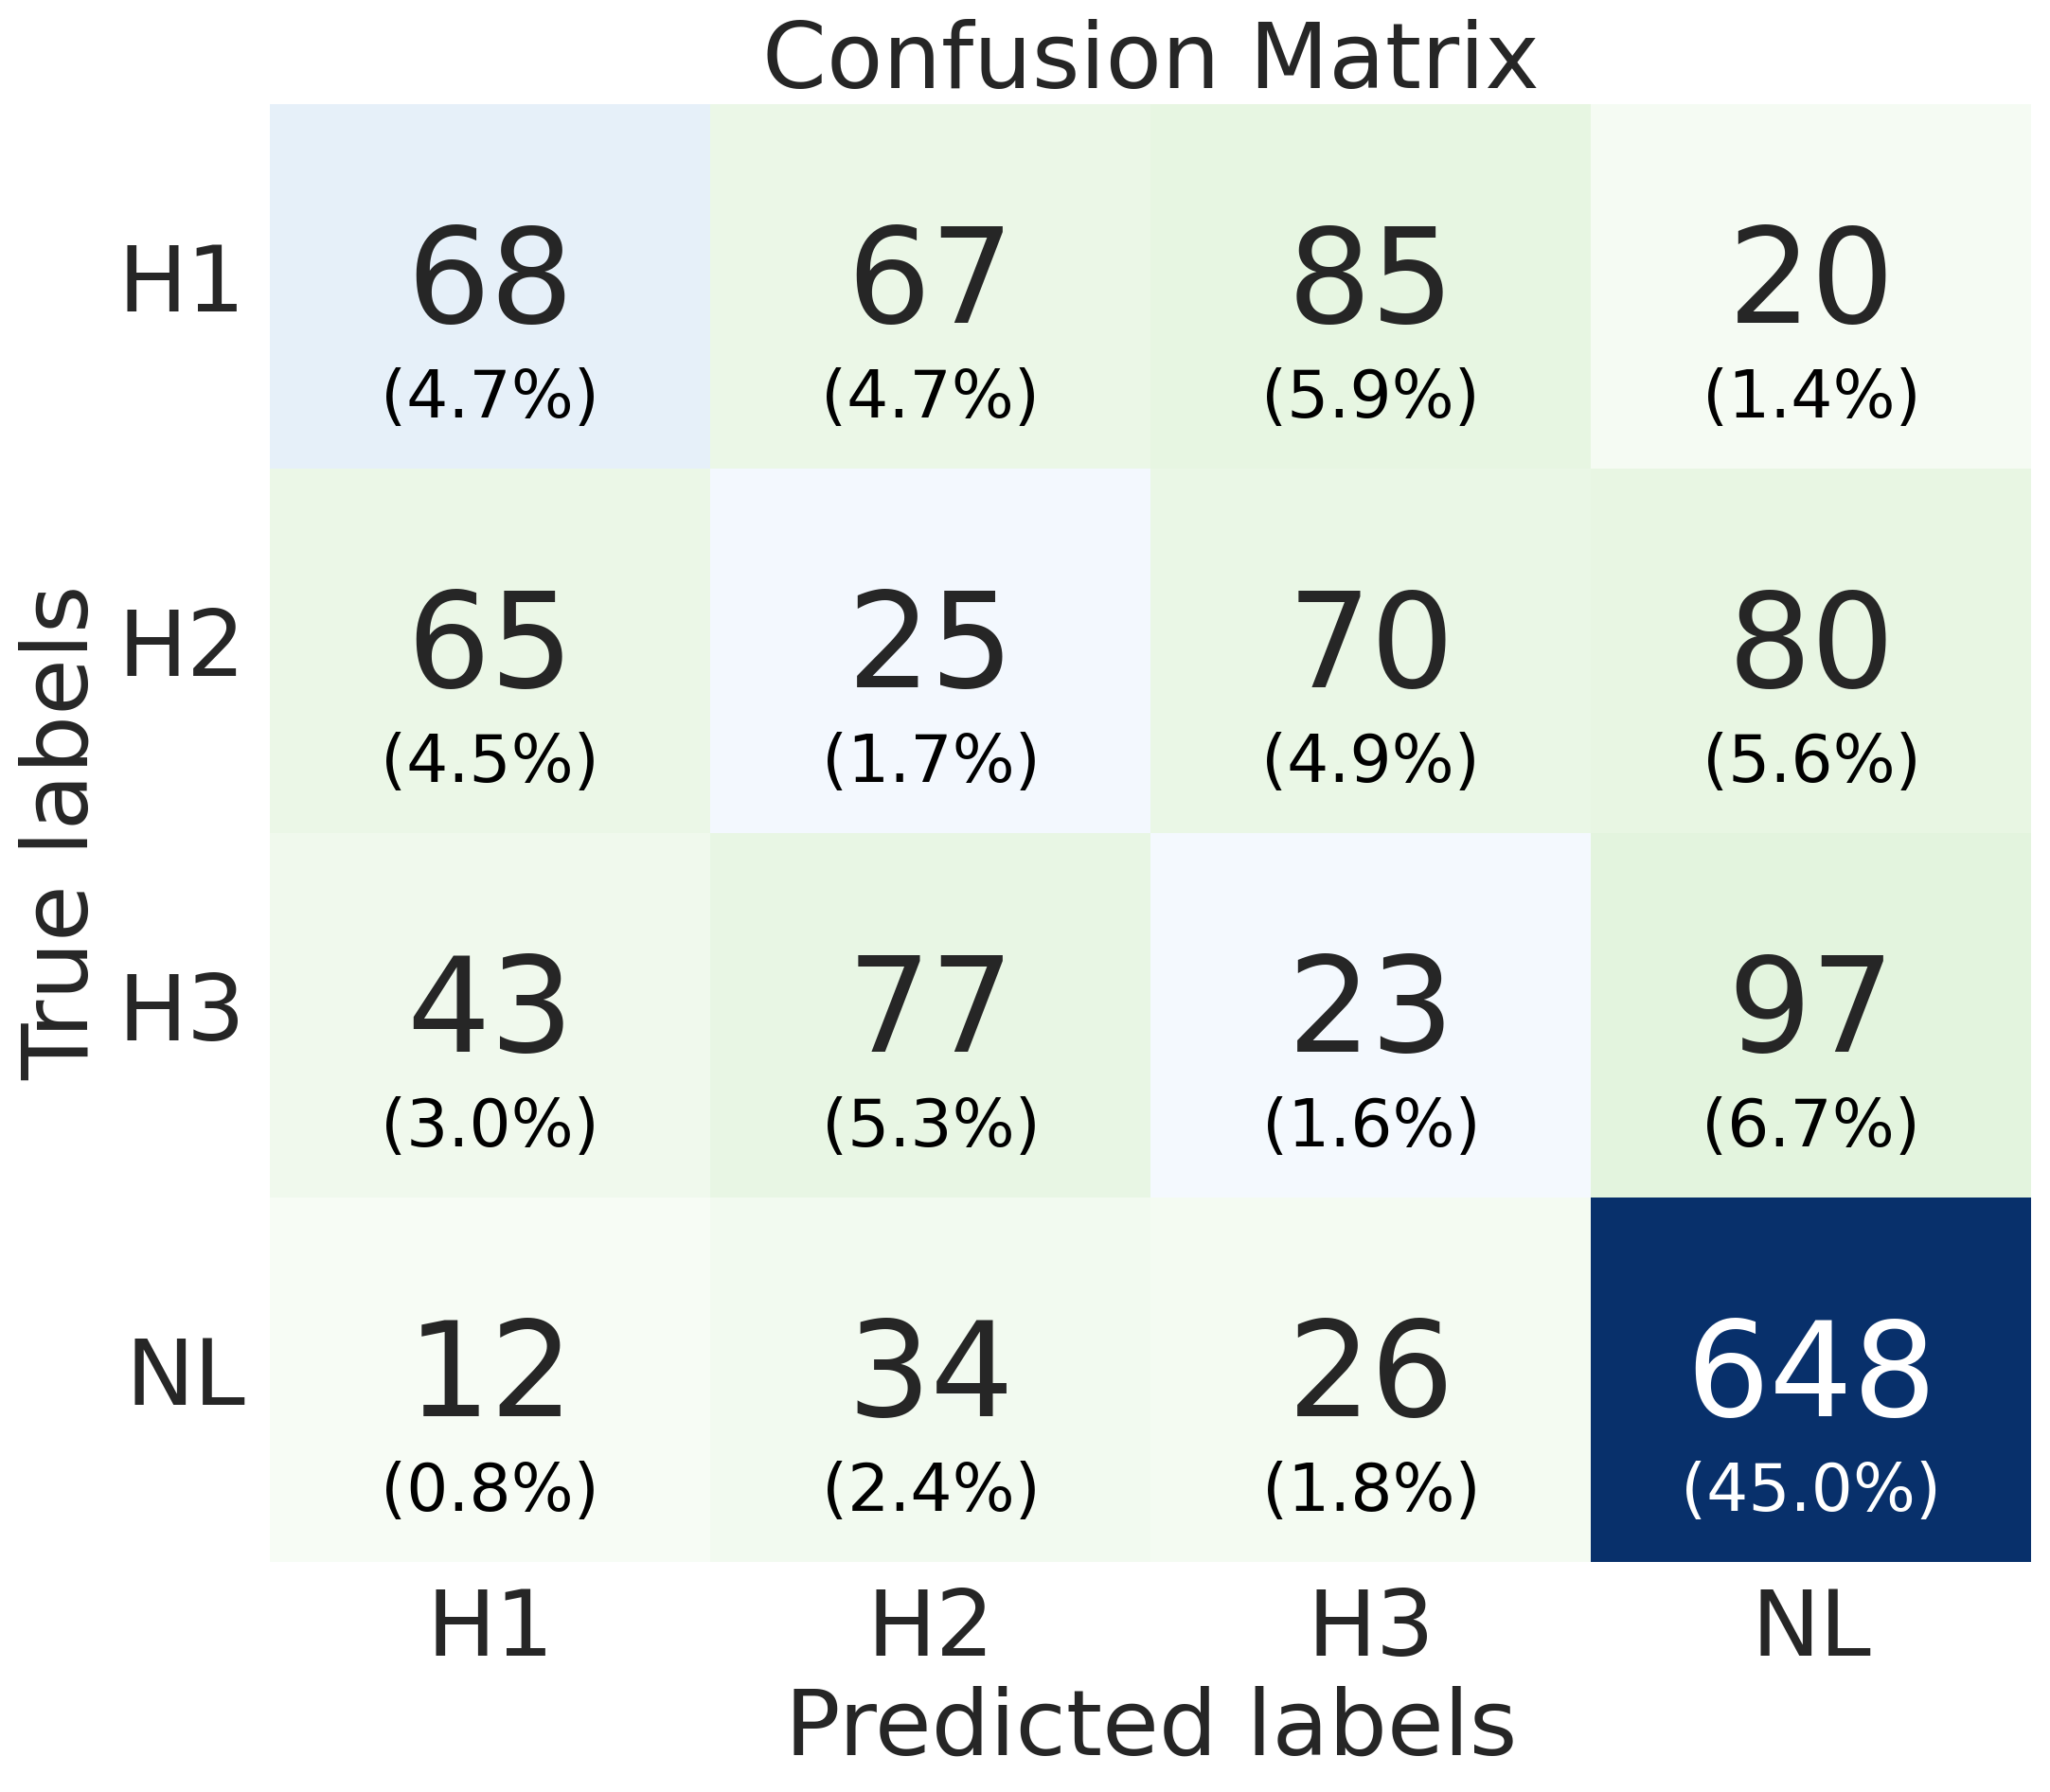

In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_conf_matrix_DL(z, label, title, tilt, cb):
    fontS = 35
    plt.figure(figsize=(12, 10), dpi=200)
    ax = plt.subplot()
    sns.set(font_scale=3)
    
    off_diag_mask = np.eye(len(label), dtype=bool)
    vmin = np.min(z)
    vmax = np.max(z)
    
    total = np.sum(z)
    percentages = z / total * 100
    
    blues = sns.color_palette("Blues", as_cmap=True)
    greens = sns.color_palette("Greens", as_cmap=True)
    
    sns.heatmap(z, annot=True, mask=~off_diag_mask, cmap=blues, vmin=vmin, vmax=vmax, cbar=False, fmt='d', annot_kws={"size": 50})
    sns.heatmap(z, annot=True, mask=off_diag_mask, cmap=greens, vmin=vmin, vmax=vmax, cbar=False, fmt='d', annot_kws={"size": 50})
    
    for i in range(len(label)):
        for j in range(len(label)):
            if not off_diag_mask[i, j]:
                color = "white" if blues(z[i, j] / vmax)[0] < 0.5 else "black"
            else:
                color = "white" if greens(z[i, j] / vmax)[0] < 0.5 else "black"
            ax.text(j + 0.5, i + 0.45 + (len(label)*0.09), f'({percentages[i, j]:.1f}%)', ha="center", va="center", color=color, fontsize=25, fontweight='light')
    
    ax.set_xlabel('Predicted labels', fontsize=fontS)
    ax.set_ylabel('True labels', fontsize=fontS)
    
    if tilt:
        ax.set_xticklabels(label, rotation=45, fontsize=fontS)
        ax.set_yticklabels(label, rotation=45, fontsize=fontS)
    else:
        ax.set_xticklabels(label, rotation=0, fontsize=fontS)
        ax.set_yticklabels(label, rotation=0, fontsize=fontS)
        
    ax.set_title('Confusion Matrix', fontsize=fontS)
    plt.savefig(title + '.pdf', bbox_inches='tight')
    plt.show()

# DL Binary Confusion Matrix
z_binary_DL = np.array([[129, 15], [5, 139]])
title_binary_DL = "binary_DL"
plot_conf_matrix_DL(z_binary_DL, lp_label, title_binary_DL, False, True)

# DL Size Confusion Matrix
z_size_DL = np.array([[38, 2, 8, 0], [6, 26, 16, 0], [1, 0, 44, 3], [2, 0, 9, 133]])
title_size_DL = "size_DL"
plot_conf_matrix_DL(z_size_DL, size_label, title_size_DL, False, True)

# DL Location Confusion Matrix
z_location_DL = np.array([[17, 24, 7, 0], [2, 39, 5, 2], [1, 16, 28, 3], [0, 11, 1, 132]])
title_location_DL = "location_DL"
plot_conf_matrix_DL(z_location_DL, location_label, title_location_DL, False, True)

# Human Binary Confusion Matrix
z_binary_Human = np.array([[648, 72], [197, 523]])
title_binary_Human = "binary_Human"
plot_conf_matrix_DL(z_binary_Human, lp_label, title_binary_Human, False, True)

# Human Size Confusion Matrix
z_size_Human = np.array([[103, 26, 16, 95], [96, 47, 27, 70], [42, 71, 95, 32], [34, 26, 12, 648]])
title_size_Human = "size_Human"
plot_conf_matrix_DL(z_size_Human, size_label, title_size_Human, False, True)

# Human Location Confusion Matrix
z_location_Human = np.array([[68, 67, 85, 20], [65, 25, 70, 80], [43, 77, 23, 97], [12, 34, 26, 648]])
title_location_Human = "location_Human"
plot_conf_matrix_DL(z_location_Human, location_label, title_location_Human, False, True)